In [2]:
# Load dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# Load data from the csv file

datadf = pd.read_csv("Dataset/fraud_data.csv")

# Descriptive statistics of the data
print(datadf.describe())

# Describe the data
print(datadf.info())

                amt           lat          long      city_pop     merch_lat  \
count  14446.000000  14446.000000  14446.000000  1.444600e+04  14446.000000   
mean     124.430073     39.787692   -110.874225  1.065370e+05     39.787991   
std      231.352587      5.317039     12.985813  2.902916e+05      5.360593   
min        1.000000     20.027100   -165.672300  4.600000e+01     19.032689   
25%       12.080000     36.715400   -120.415800  4.930000e+02     36.794655   
50%       51.520000     39.666200   -111.098500  1.645000e+03     39.620953   
75%      101.030000     41.940400   -101.136000  3.543900e+04     42.275740   
max     3261.470000     66.693300    -89.628700  2.383912e+06     67.510267   

         merch_long  
count  14446.000000  
mean    -110.874892  
std       12.995596  
min     -166.670685  
25%     -120.146253  
50%     -111.192629  
75%     -100.446822  
max      -88.646366  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (

In [4]:
# Convert 'trans_date_trans_time' column to datetime type
datadf['trans_date_trans_time'] = pd.to_datetime(datadf['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Extract date components from 'trans_date_trans_time'
datadf['trans_year'] = datadf['trans_date_trans_time'].dt.year
datadf['trans_month'] = datadf['trans_date_trans_time'].dt.month
datadf['trans_day'] = datadf['trans_date_trans_time'].dt.day
datadf['trans_hour'] = datadf['trans_date_trans_time'].dt.hour
datadf['trans_minute'] = datadf['trans_date_trans_time'].dt.minute
datadf['trans_second'] = datadf['trans_date_trans_time'].dt.second

# Convert 'dob' column to datetime type 
datadf['dob'] = pd.to_datetime(datadf['dob'], format='%d-%m-%Y')

# Extract year from 'dob'
datadf['dob_year'] = datadf['dob'].dt.year


# Drop unwanted rows and clean up formatting
datadf = datadf[(datadf['is_fraud'] == "0") | (datadf['is_fraud'] == "1")]
datadf.dropna()
datadf = datadf[datadf["amt"]<=1500]
datadf['merchant'] = datadf['merchant'].str.replace('"', '')
datadf['job'] = datadf['job'].str.replace('"', '')

# Create sub-dataframes and print confines of dataset
datadf #complete and cleaned dataframe
#frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
#truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)

# Print the number of transactions in the dataset
print(f'The dataset contains {len(datadf)} transactions.')
# Print the time period of the dataset
print(f'The dataset transactions begin on {datadf["trans_date_trans_time"].min()}.')
print(f'The dataset transactions end on {datadf["trans_date_trans_time"].max()}.')

The dataset contains 14435 transactions.
The dataset transactions begin on 2019-01-01 00:00:00.
The dataset transactions end on 2020-12-31 23:59:00.


### Task 4: Analyze Merchants and Categories with Higher Fraud Incidence

- **Assigned to Person D:**
  - Identify which merchants and categories have the highest rates of fraud by calculating fraud incidence for each.

In [5]:
catrename = {'entertainment': "Entertainment", 
        'food_dining':"Food and Dining", 
        'gas_transport': "Gas and Transportation", 
        'grocery_net': "Online Grocery",
        'grocery_pos': "POS Grocery", 
        'health_fitness': "Health and Fitness", 
        'home': "Home", 
        'kids_pets': "Kids and Pets", 
        'misc_net':"Misc Online",
        'misc_pos': "Misc POS", 
        'personal_care': "Personal Care", 
        'shopping_net' :"Online Shopping", 
        'shopping_pos':"POS Shopping",
        'travel':"Travel"}
datadf['category'] = datadf['category'].replace(catrename)

data_is_fraud = datadf[datadf["is_fraud"] == "1"]

merchants = []
categories = []
fraud_counts = []
states = []

# Iterate over the filtered data
for i, row in data_is_fraud.iterrows():
    merchant = row['merchant']
    category = row['category']
    state = row['state']
    
    if merchant not in merchants:
        merchants.append(merchant)
        categories.append(category)
        fraud_counts.append(1)
        states.append(state)
    else: 
        index = merchants.index(merchant)
        fraud_counts[index] += 1

# Create the DataFrame with merchants, categories, and fraud counts
merchant_fraud_df = pd.DataFrame({
    "Merchant": merchants,
    "Category": categories,
    "Fraud Count": fraud_counts,
    "states": states
})

# Sort the DataFrame by fraud count in descending order
sorted_merchant_fraud_df = merchant_fraud_df.sort_values(by="Fraud Count", ascending=False)

merchant_fraud_df = sorted_merchant_fraud_df.head(10)

sorted_merchant_fraud_df.head(10)


,Merchant,Category,Fraud Count,states
24,Kiehn-Emmerich,POS Grocery,20,NE
76,"Romaguera, Cruickshank and Greenholt",Online Shopping,18,CA
55,Kerluke-Abshire,Online Shopping,18,UT
123,Kunze Inc,POS Grocery,16,NM
70,Kilback LLC,POS Grocery,15,CA
27,Terry-Huel,Online Shopping,14,CA
3,Murray-Smitham,POS Grocery,14,AK
159,Strosin-Cruickshank,POS Grocery,14,MO
32,Kutch and Sons,POS Grocery,14,CA
10,"Gottlieb, Considine and Schultz",Online Shopping,13,MO


### Bar Charts displaying the fraud rate for each category. 

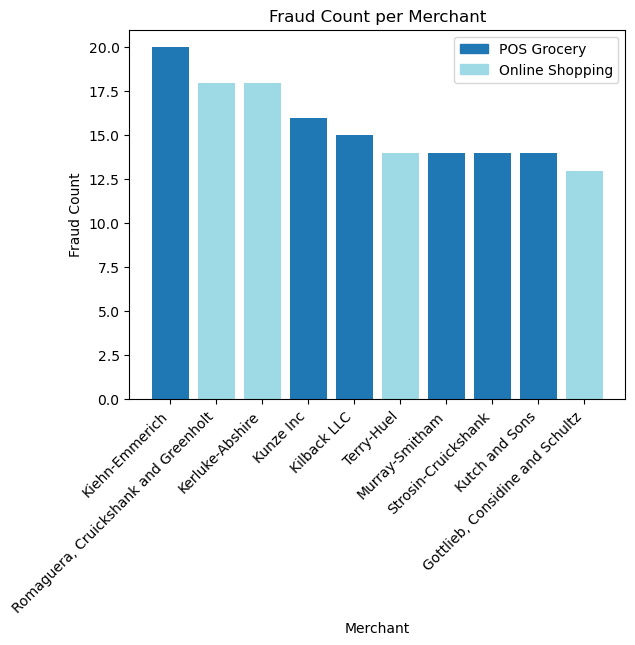

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Assuming merchant_fraud_df is already defined and has 'Merchant', 'Fraud Count', and 'Category' columns.

# Get unique categories
categories = merchant_fraud_df['Category'].unique()

# Generate colors
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

# Map categories to their corresponding color
category_color_map = dict(zip(categories, colors))

# Get the color for each merchant's category
merchant_colors = merchant_fraud_df['Category'].map(category_color_map)

# Plot the bar chart
plt.bar(merchant_fraud_df['Merchant'], merchant_fraud_df['Fraud Count'], color=merchant_colors)

# Optionally add labels and title
plt.xlabel('Merchant')
plt.ylabel('Fraud Count')
plt.title('Fraud Count per Merchant')
plt.xticks(rotation=45, ha='right')

# Create custom legend handles
legend_handles = [mpatches.Patch(color=category_color_map[category], label=category) for category in categories]

# Add the custom legend to the plot
plt.legend(handles=legend_handles, loc='upper right')

# Show the plot
plt.show()


### Describe Merchants per count, mean, std, etc. 

In [7]:
sorted_merchant_fraud_df.describe()

,Fraud Count
count,509.000000
mean,3.622790
std,3.314718
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,20.000000


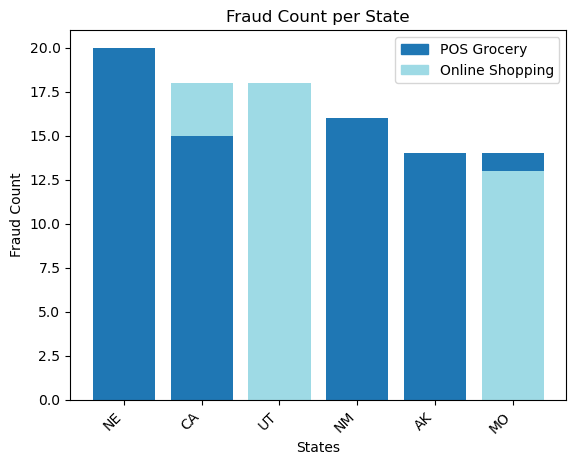

In [12]:

# Plot the bar chart
plt.bar(merchant_fraud_df['states'], merchant_fraud_df['Fraud Count'], color=merchant_colors)

# Optionally add labels and title
plt.xlabel('States')
plt.ylabel('Fraud Count')
plt.title('Fraud Count per State')
plt.xticks(rotation=45, ha='right')

# Create custom legend handles
legend_handles = [mpatches.Patch(color=category_color_map[category], label=category) for category in categories]

# Add the custom legend to the plot
plt.legend(handles=legend_handles, loc='upper right')

# Show the plot
plt.show()

In [ ]:
#add box plot code here